<a href="https://colab.research.google.com/github/amalbackeraa24bca003-source/NSL-KDD-Dataset-Intrusion-detection-and-network-attack-record/blob/main/NSL-KDD%20Dataset%20%E2%80%93%20Intrusion%20detection%20and%20network%20attack%20record.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✔ NSL-KDD Dataset Loaded Successfully!

   duration  protocol_type   service      flag  src_bytes  dst_bytes  \
0  0.666287       0.577740  0.248644  0.039280   0.151331   0.441503   
1  0.143014       0.729235  0.539983  0.485997   0.055436   0.291892   
2  0.401813       0.101389  0.961499  0.367041   0.133935   0.567280   
3  0.887278       0.168009  0.660708  0.656651   0.614879   0.400250   
4  0.360109       0.274258  0.064115  0.353499   0.531030   0.539846   

       land  wrong_fragment    urgent       hot  ...  dst_host_srv_count  \
0  0.996257        0.739421  0.042406  0.244036  ...            0.223672   
1  0.143944        0.858332  0.304242  0.901082  ...            0.610218   
2  0.080431        0.875795  0.603445  0.235740  ...            0.077247   
3  0.853977        0.907267  0.469452  0.998242  ...            0.054651   
4  0.001381        0.897988  0.350272  0.597418  ...            0.118315   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                

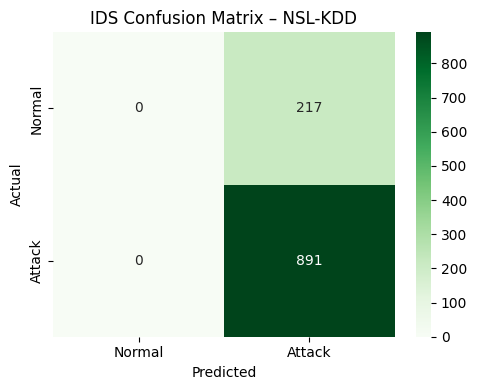

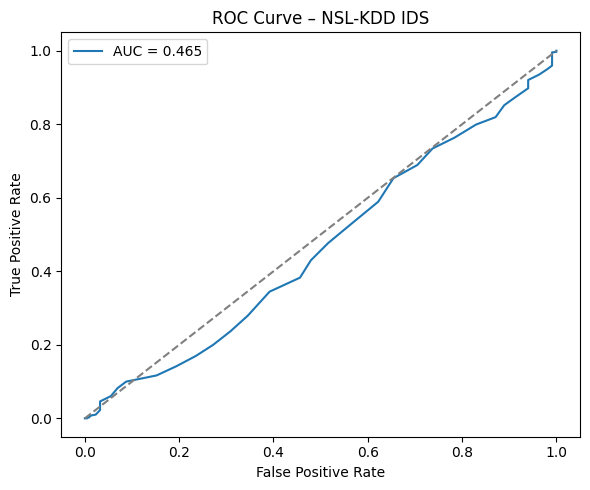

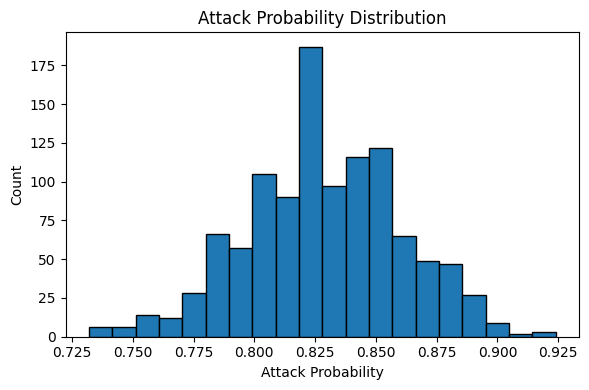


=== SAMPLE IDS PREDICTION ===
Intrusion Prediction : Attack
Attack Probability   : 0.736


In [2]:

#  INTRUSION DETECTION SYSTEM (IDS) – NSL-KDD DATASET


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, confusion_matrix, roc_curve, auc
)


df = pd.read_csv("/content/drive/MyDrive/nsl_kdd_dataset.csv")

print("✔ NSL-KDD Dataset Loaded Successfully!\n")
print(df.head())




df["attack_flag"] = df["label"].apply(lambda x: 0 if x == "normal" else 1)


categorical_cols_to_convert = ['protocol_type', 'service', 'flag']
for col in categorical_cols_to_convert:
    if col in df.columns and df[col].dtype != 'object':
        df[col] = df[col].astype(str)

X = df.drop(["label", "attack_flag"], axis=1)
y = df["attack_flag"]

numeric_cols = X.select_dtypes(include=['int64','float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

print("\nNumeric Columns :", list(numeric_cols))
print("Categorical Columns :", list(categorical_cols))



preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)



model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("classifier", RandomForestClassifier(
        n_estimators=250,
        random_state=42,
        class_weight="balanced"
    ))
])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)



model.fit(X_train, y_train)
print("\n✔ Model Training Completed!")


y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\n============= IDS MODEL PERFORMANCE ===========1")
print("Accuracy      :", accuracy_score(y_test, y_pred))
print("Precision     :", precision_score(y_test, y_pred))
print("Recall        :", recall_score(y_test, y_pred))
print("ROC-AUC Score :", roc_auc_score(y_test, y_prob))
print("=================================================\n")


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Normal", "Attack"],
            yticklabels=["Normal", "Attack"])
plt.title("IDS Confusion Matrix – NSL-KDD")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – NSL-KDD IDS")
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(6,4))
plt.hist(y_prob, bins=20, edgecolor="black")
plt.title("Attack Probability Distribution")
plt.xlabel("Attack Probability")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



sample = pd.DataFrame([
    {
    "duration": 0,
    "protocol_type": "tcp",
    "service": "http",
    "flag": "SF",
    "src_bytes": 181,
    "dst_bytes": 5450,
    "land": 0,
    "wrong_fragment": 0,
    "urgent": 0,
    "hot": 0,
    "num_failed_logins": 0,
    "logged_in": 1,
    "num_compromised": 0,
    "root_shell": 0,
    "su_attempted": 0,
    "num_root": 0,
    "num_file_creations": 0,
    "num_shells": 0,
    "num_access_files": 0,
    "num_outbound_cmds": 0,
    "is_host_login": 0,
    "is_guest_login": 0,
    "count": 9,
    "srv_count": 9,
    "serror_rate": 0.00,
    "srv_serror_rate": 0.00,
    "rerror_rate": 0.00,
    "srv_rerror_rate": 0.00,
    "same_srv_rate": 1.00,
    "diff_srv_rate": 0.00,
    "srv_diff_host_rate": 0.00,
    "dst_host_count": 9,
    "dst_host_srv_count": 9,
    "dst_host_same_srv_rate": 1.00,
    "dst_host_diff_srv_rate": 0.00,
    "dst_host_same_src_port_rate": 1.00,
    "dst_host_srv_diff_host_rate": 0.00,
    "dst_host_serror_rate": 0.00,
    "dst_host_srv_serror_rate": 0.00,
    "dst_host_rerror_rate": 0.00,
    "dst_host_srv_rerror_rate": 0.00
}])

pred = model.predict(sample)[0]
prob = model.predict_proba(sample)[0][1]

print("\n=== SAMPLE IDS PREDICTION ===")
print("Intrusion Prediction :", "Attack" if pred == 1 else "Normal")
print("Attack Probability   :", prob)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
